In [8]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.getcwd()

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import json
import skimage


from skimage.io import imread, imshow

%matplotlib inline

In [ ]:
import json

In [ ]:
with open('D:\Segmentation_project\Final\MaskExp.json') as f:
    data = json.load(f)
f.close()

In [ ]:
data

In [ ]:
for n,i in enumerate(data):
    if 'Masks' in i:
        #print(n)
        print(i['Label'])
        #print(i['Labeled Data'])

In [ ]:
TRAIN_PATH = 'D:\Segmentation_project\Final\Data_all\\'
MASK_PATH = 'D:\Segmentation_project\Final\Masks_all\\'

In [ ]:
c =0
Masks_all = []
Masks_ID = []
All_Polygons =[]
all_points_x = []
all_points_y = []
for i in data[0:100]:
    Polygon = []
    if 'Masks' in i:
        #print(i['Masks']['Cell'])
        Masks_all.append( i['Masks']['Cell'])
        Masks_ID.append(i['External ID'])
        c= c+1
        #print(i['Label'])
        for points in i['Label']['Cell']:
            #print(points['geometry'])
            Polygon.append(points['geometry'])
            print(Polygon)
    #All_Polygons.append(Polygon)
            #for coord in Polygon:
             #   x_coord = 
#print(c)

In [ ]:
c = 0
for img in data:
    polygons = []    
    if 'Masks' in img:
        c = c+1
        path_name = img['External ID']
        
        for region in img['Label']['Cell']:
            all_points_x = []
            all_points_y = []
            #print('region:', region)
            for xy in region['geometry']:
                all_points_x.append(xy['x'])
                all_points_y.append(xy['y'])
            temp_dict = {'all_points_x': all_points_x, 'all_points_y': all_points_y, 'name': 'polygon'}
            
            #print(temp_dict)
            polygons.append(temp_dict)
        print(polygons)
        print()
print(c)

In [ ]:
import skimage
rr, cc = skimage.draw.polygon(polygons[0]['all_points_y'], polygons[0]['all_points_x'])


In [ ]:
cc

In [ ]:
# We need a dictionary of the form {all_points_x: [], all_points_y: [], name: polygon} 
# for each cell in one image passed to the function

In [ ]:
PATH2 = 'D:/Segmentation_project/Final/Indv_data_used/'

In [ ]:
Masks_ID

In [ ]:
import cv2

In [ ]:
c = -1
train_json = []
val_json = []
for i in data:
    c=c+1
    polygons = []    
    if 'Masks' in i:
        path_name = i['External ID'][0:-4] +'.tif'
        print(path_name)
        if c%3 ==0:
            img = cv2.imread(PATH2+path_name,cv2.IMREAD_ANYDEPTH)
            cv2.imwrite("D:\Segmentation_project\Final\MRCNN\val\\"+path_name, img)
            val_json.append(i)
        else:
            img = cv2.imread(PATH2+path_name,cv2.IMREAD_ANYDEPTH)
            cv2.imwrite("D:\Segmentation_project\Final\MRCNN\train\\"+path_name, img)
            train_json.append(i)

with open('D:/Segmentation_project/Final/MRCNN/Train/region_data.json', 'w') as outfile:
    json.dump(train_json, outfile)
outfile.close()
with open('D:/Segmentation_project/Final/MRCNN/Val/region_data.json', 'w') as outfile:
    json.dump(val_json, outfile)
outfile.close()

In [ ]:
with open('D:/Segmentation_project/Final/MRCNN/Val/region_data.json') as f:
    data = json.load(f)
f.close()

In [ ]:
with open('D:/Segmentation_project/Final/MRCNN/Train/region_data.json') as f:
    data = json.load(f)
f.close()

In [ ]:
data

In [ ]:
img = cv2.imread('D:/Segmentation_project/Final/MRCNN/Train/xy01c10302.tif',cv2.IMREAD_UNCHANGED)
plt.imshow(img) # expects distorted color
plt.show()

In [ ]:
image = skimage.io.imread('D:\Segmentation_project\Final\MRCNN\Val\im_1xy01c10001.tif')
print(image)
plt.imshow(image) # expects distorted color
plt.show()


In [ ]:
img = cv2.imread('D:\Segmentation_project\Final\MRCNN\Val\im_1xy01c10001.tif',cv2.IMREAD_UNCHANGED)
plt.imshow(img) # expects distorted color
plt.show()

In [2]:
from samples.balloon import balloon
config = balloon.BalloonConfig()
BALLOON_DIR = "D:\Segmentation_project\Final\MRCNN"

In [3]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
dataset = balloon.BalloonDataset()
dataset.load_balloon(BALLOON_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

im_1xy01c10195.tif
im_1xy01c10193.tif
im_1xy01c10175.tif
im_1xy01c10172.tif
im_1xy01c10169.tif
im_1xy01c10108.tif
im_1xy01c10076.tif
im_1xy01c10070.tif
im_1xy01c10061.tif
im_1xy01c10058.tif
im_1xy01c10055.tif
im_1xy01c10052.tif
im_1xy01c10049.tif
im_1xy01c10067.tif
im_1xy01c10046.tif
im_1xy01c10043.tif
im_1xy01c10040.tif
im_1xy01c10037.tif
im_1xy01c10034.tif
im_1xy01c10031.tif
im_1xy01c10028.tif
im_1xy01c10025.tif
im_1xy01c10022.tif
im_1xy01c10019.tif
im_1xy01c10016.tif
im_1xy01c10013.tif
im_1xy01c10010.tif
im_1xy01c10007.tif
im_1xy01c10004.tif
im_2xy01c10259.tif
im_2xy01c10256.tif
im_2xy01c10253.tif
im_2xy01c10250.tif
im_2xy01c10247.tif
im_2xy01c10244.tif
im_2xy01c10241.tif
im_2xy01c10238.tif
im_2xy01c10235.tif
im_2xy01c10232.tif
im_2xy01c10229.tif
im_2xy01c10226.tif
im_2xy01c10223.tif
im_2xy01c10220.tif
im_2xy01c10217.tif
im_2xy01c10214.tif
im_2xy01c10211.tif
im_2xy01c10208.tif
im_2xy01c10205.tif
im_2xy01c10202.tif
im_2xy01c10199.tif
im_2xy01c10196.tif
im_2xy01c10193.tif
im_2xy01c101

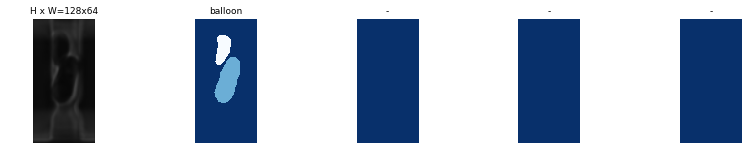

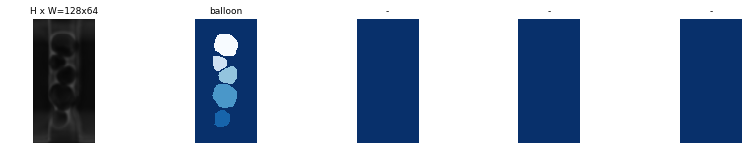

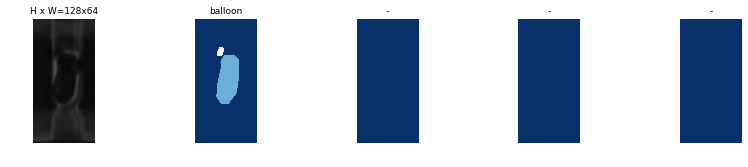

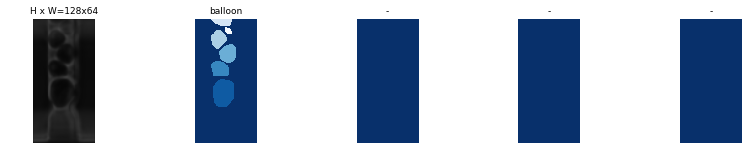

In [4]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids,4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    plt.show()
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

image_id  270 D:\Segmentation_project\Final\MRCNN\train\im_6xy01c10013.tif
image                    shape: (128, 64, 3)          min: 1824.00000  max: 18614.00000  uint16
mask                     shape: (128, 64, 5)          min:    0.00000  max:    1.00000  bool
class_ids                shape: (5,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (5, 4)                min:   16.00000  max:  114.00000  int32


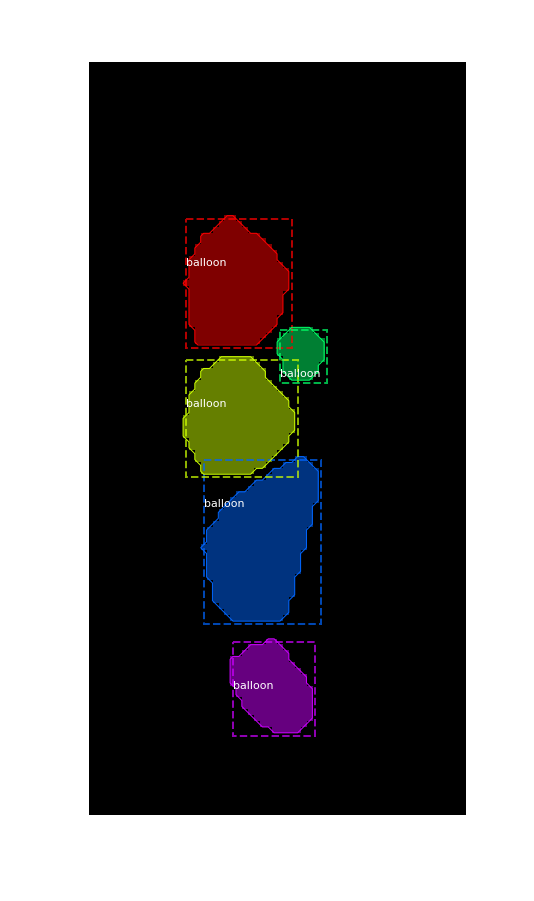

In [7]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_imdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAuwAAACnCAYAAABKIAl6AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvqOYd8AAAHrlJREFUeJzt3V+MNNl51/Hf6arqntllvUkusIN8YQUhGRmUOAHjJBasIwMRK/4IkeBEMZIxIhJ2+HdBUEAGAnbkCO4WrChxHANBsSJBQLKQI8dY8drZxMRRRIxIZEJAFgkmCvvHnunu6urDxfRT+/SZU9XVM/O+75mZ70dqTU91dVX1aqT99fM+9ZwQYxQAAACAMs0e9QUAAAAAGEZgBwAAAApGYAcAAAAKRmAHAAAACkZgBwAAAApGYAcAAAAK9sgCewjhNSGEjyXbPn+F4/zHEMLrd8//VAjhd0IIYff7D4YQ3jbhGP84hPA//fWEEF4fQvhUCOFnQwgfDyF8zW771+y2fSKE8J9CCK8+cOy/FEL4md2+35m89qH0vwFup9zf88i+n9/9fCqE8CMP9soAAMBtdxcq7M9K+ubd82+W9FlJr3O/f3LCMf6FpDcn235T0rfGGP+opH8q6R/ttv81SR+IMT4l6UOSvmfooCGE10l6i6S3xBjfHGP8N+61PyjpKyZcGwAAAO6x4gN7COH9uyr1LITw0RDCH0l2eVbSm3bPv1bS+yW9KYSwkPSqGONvHDpHjPE3JW2Tbb8VY3xp9+ta0mb3/HN6OWh/laQvhhAWIYRnQwivDSG8MoTwCyGEr5D0FyR9WdJPhxD+XVKNf7ek9074T4Db48kQwo+HEP5zCOFvhBDevPuXlU+GEP59COFk6I0hhDeGED69+zt6f3jZD+22fTqE8Ibdvj8WQngmhPCREMJzIYTf/fA+IgAAeNjqR3z+bwghfOLAPn9L0sd1US3/mRjjzyev/7ykHw0hNJKipJ+V9M8k/YqkX5CkEMI3SvqBzLG/P8b48bGThxAel/QeSW/fbfqYpI+GEN4haSHpDTHGVQjhL0v6MUkvSPqbMcbnQwi/Rxeh/k9IeloXlfq3hhCekvRrkv7Pgc+O2+U1kr5F0lLSZyT92RjjmyUphPA+Sd8u6V8OvPcZSd8eY/z1EMKPSvrTuvhC3cQY37RryfoJSW/Y7f/5GOO7QgjftzvuMw/oMwEAgEfsUQf2X4wxvsV+yfWwxxiXIYQPSvpBSV898PoXJf15Sb8UY/y/IYRX6aLq/uxun5+T9NSxF7f7EvBhST8QY/yvu83vk/T3Y4z/NoTwHbqokr8zxvhrIYT/IemrYoyf3u37O5I+E2OMIYSP7t4rSX9X0ltFS8xd89/sX2VCCL8i6VUhhB/WxRe7V0p6ceS9T8YYf333/NOSXisp7J5rF+S/0u3/i7uf/0vS7725j4D7KITwLl38i+DnY4x/5VFfD+4n/g5RglL/Dm9DS8xXS3qHpH+i4RaSZyX9HUmf2v3+vyV9m3b96yGEb9zdJJo+vmXkvDNJ/1rST8UYf8q/JOm3d8+/qIsKukIIf1xSI+m3Qwh/Zvf6JyT9od3zb5D030MIT0h6lS6qpR+S9HUhhL93+L8EboHXhhB+VwihlvQHJP1DSf8gxvjHJP0HXfztDHnBbmyW9E2SfnX3+Cbp4mZnSc+7/aN7PnZc4KAY4zMxxqdK+p8T7h/+DlGCUv8OH3WFfdQuNH9QFy0mz4UQfiKE8HSM8SPJrp+U9LclPbf7/VOS/pwu2mIOVth336beKun37yZ9fLek1+uijeWVIYTvkvRfYozfo4svDj8UQtjoIqB/966H+D2S/qQuet0/FkL4rKSflvStu7afmaS/uqvAft3uvK+R9CMxxvdc7b8QCvMbkn5Y0u/TxZex35L0gRDCr+qiVWqswv7XJf14CKHTxX0SFvCfDiE8K6nSyA3OAADg7goxxsN7AQAAAHgkim+JAQAAAO4zAjsAAABQMAI7AAAAUDACOwAAAFCwIqbEvPrVr46z2UwhXEynsxth7Xf76YUQ1DSNnnjiCS2XS52dnWm1Wmm73SrG2P/0+9vP3EOSZrOZqqpS0zSqqkqz2UwxRrVtq9VqpRij6rpWXdeqqkoxRm02G3Vd15/PX+vY9Xddpy984QuM4yvI6evfda07sD/7kfcd3ulIX//09974MVPnv/QMf4cFue7f4W3F32E5+BtECfg73FdEYLcQLEm5qTW5wDubzTSfz3V6eqq6rhVC0Gw2U9u2fXhOA3sutEvaC/c+vNs1SVLbtoox7gX67Xbbv8fOl4b03LXb8XG3fP3T3/tAQjsAALjfikiNVl230J2rfqf89rquNZ/P9x5N0/RfBPyjaZo+cPugbez3dLu95s8/9LDPcJXPhdvtYVTEAQDA/VJEYE9D7FCg9SHanlt1vKqqS4F96GFh3Z9/NpvthWp/fH/+XDXeHyd9PlbZx910U6Gd8A8AAKRCArs3FGbTKrjZbrfquk4xxr6NpWmaveA+n8+1WCy0WCz69hl7VFXV96Tbw8K7P5+/Lv/FYSx8E8zvL8I2AAC4KUX0sHu+gp776feLMarruv6mT99TbsHb2HML9mkIt33sxlOrtvsKuz+vPfc3ufrqeXq9VrXH/eFDO73tAADgqooI7EN95PY8t49vW+m6TpvNZi80W0D3v1tIt0Dvw7jfL1dhT6+36zpJ6r8oTAnjQ/9KgLvPwvvU4E6FHgAAmGICu38+Vl23576ibhXu7Xa714uePvfBOu1NPyStnvtz5z7PWEU9d0Mr7geCOAAAOFYRgV06HJrTyS25irtvaUn70auqUtd1ffC2vvep1XE7R+7c6RcLH9aHWmQI7DD/7zPPSJK+8g+/6xFfCQAAKFExgf1YPjRbILdpMXYTqQ/rts3e62e1W7Xc2mbGxjf68w/9ThjHVVhwlwjvAADgZUVMiTk08zy3rz1sMoxfgdQq3DZBxgK5D/LSfh98bvb60Az1ses55gEM8eEdAADcb0VU2Kf0rA/t76e62I2n9tPYjPbFYrH3nq7r9m4uTeeop33wuesYC+CH+thx9/2rD37fpW1ve/t7H8GVAACA26qYCruftnLoYfvaTabW6tJ1ndbrtdbrtdq27Z8vl0t9+ctf1pe+9CUtl0ttNhtJ+yus5q4prbDn9qHCjiG5sD62PUWVHQAASAUFdh/GjwnwFqS7rlPbtv3NpHaMzWazF9rPzs60Wq202Wyyfeh+ISarxqc3kaY3nxLYkToUyv3r9KsDAIAxxQX23A2haXD377FQ3rZtH8LtdQvfFuZXq5XOz891fn6u9XqdXewovRHVv5ZrkZly7en1HzOZBncXoR0AAExRRA+7LUIkHR5/6CvrMca+7cUHcAvxdsNpLhxbX/vp6Wnf226VdXvdxj+2bavtdrt302qMsd/uz5FrncltS1dQxd0wtd3F72897YR2AACQU0yFPa1Ej1WmfRV9tVplW2GGKtz2u7XKtG2r2WymxWKhk5MTzefzS5Nm7Hy+up6+nrvGQ9twtxwb1q/7PgAAcD8UUWEf6useaxux/a2ybqHYgrRV19MVSf0xLfCfnJyoaRrVdb13bB/4/Q2otk/6hUDKT4bJbaMlBgAAAFMUUWEfqoLnHmmF3XrXrVe967p+rKM9bHtaebd2F6vQS/sLJdk5/Pb0mtNrG6vqpw/AUGUHAABDiqiwp+F1qBruw7S/qdSO4avpPqD746TVbgv4fia7BfOhxZJ84E+r+0Pn8celJQYAAABT3YrA7oOvn9DiVypNA3raqpLub8fy58xV060dxu+XhvW07SYN62m1Pn0OAAAADCkisOcqzkOh3Veyc0F66AZV2yed5lJVVT/5Jd0nfZ8d07fYpO0t6cx2f+0eFXYAAABMUUwPezpFJZ32kusHl7Q30WVsIkuuB76qKjVN06+UOtYzb1V1Py7y0ESYQ4s/4W6x8YwP+70AAOBuK6LCLg3PX8+1xfjfm6bZmw5jr6UjGY1NevGV9e12q7Zt995rbTE+dFu/fO6LgT/+lAo7gR2GsA4AAMYUEdjTGzaHQnrutfl83k+LsYCdq2T7G0h9YI8xarlcXrrR1C+QlIb/obYZC+tjQR3wCOsAAOCQIgK7dPVwa6uU2mqnQ9NZLKj7Wepd1+n8/PzSjaiz2Uzz+VxN0+xV2dMpL7kbS+31QxNjgKGw/o53v3Pv9w98/z9/GJcDAAAKVUxgz1XYfUBOq9e2vaoqnZ6eqm3bPrT7Y/qw7qfCpNNd/Dl9Zb2qqr1e+nTSzNTPRdX9fnjb2987aaZ6GtbTkJ6+RmgHAOD+KuKm01Q69/zQXPT5fK7T09N+xVJrd6mqSnVdq2mafns6DWboxtB0UaWhG1fHrj+9Tv8ZcHcdanPxr7/j3e8cDet+PwAAcD8VEdivGmAtWIcQ+tBuwX2xWOw95vN5NrCnPfHpDPbNZtOvnJqOc/Tvo3IObyi0p2H9GIR2AADupyIC+5SwO1SZthAdQlDTNDo9PdVjjz3Wh3cL8HVd77WzjIV163X34xyHxj2OfZ5DE25wt6Wh/TphHQAA3F/F9LB7h4Kwf9513V7fel3Xms1mquu638fGNuYq5Ln2Gwvtvne967q9cY+560p77NPXcP/kKu2EdQAAcIxiAvuhQDv0eloB99Vzq5LbDakW2tPX0xCe3tjq+919H31apR+bFANIhHUAAHC8IgL7WGV6ynstsNtP/97tdttPj/Fh3Yd2abyP3t+c6sdCDs2JT6fbDB0T9wthHQAAXEURgT01tafd9k1vCPXH2Ww2att2r/ru97Fj5dptciuZTrk+qusAAAC4KUUE9psIt7mVTdP+86EbTQ8F9GMR1gEAAHBTigjsqakrg6a957nFj2x7bjqMf4+kSz3qQ+fxPex+GwAAAHDTihjreB0+YPsJL37xJL/CaSq9qTTthc+tljq0gFPu2obOifuH1UoBAMBVFFlhPybQxhj7IF1VlWKM/QqnVVVJUr/4kaRLCx6lz/24R3vYcdIJMel15G6cpfIOAACA6ygisF812PoWmKqq+mNYYJek2Wymruv6wC7lQ7v9nk6Q8RX19IbWrusmfzbCOwAAAK6iiMB+HT5U++q4Vd0labFYqG3bo24qTdtrfEC352MtL7neelphcB201AAAcD/diR5261O3SnbXdWrbth/nGELoW2T8vmkvuv9pQb1pGs3nczVNs/f+sb54YAihGwAAHOtWpM7cOEb76avr6/VaZ2dneumll/TCCy/o+eef10svvaTVatX3tlvYHrqB1FfWLazP53PVda26rvv3mFyVndYXjLlKaCfoAwBwfxXXEjPWNuLDug/Fm81Gy+VS5+fnWq/X2mw2l0Y8+htF/e+5uexWWV8sFjo5OVEIQZvNph8VeWhCDP3qkKSv/Yvflt3+yx/+yT6AT1n9lLAOAMD9Vlxg96b0fNsKp+fn5zo/P+9HMvobRHMtML5S7oO7VdZPT091enqqpmn63vXcCEkgNRTUc6+PBXeCOgAAkAoP7FNsNhut12utVqu9yrq0P/XFh3T76We1S9prhTk9PdV8Pu/P4Svw/qchvEM6HNZz+/uKOwAAQOpW9LAPiTH2gd1C9VAF3aru9rAAXte1Tk9P9YpXvEJPPvmknnzyST3xxBM6OTnZmw7j30OVHTnHhvXrvg8AANwPxVTYrzLyMMao5XKptm0laW9VU98SY2HbWltms9neiqaz2Uynp6d6/PHHNZvN+oWWNpuNVquVVquV2rbNLqAE3AQL7b/84Z98xFcCAABKU0xg99XwIf5mTtvPB/OxEJ2uZmpVd+kiwNsEmKZp+rBuoyE3m426rrs0IcaflxnrAAAAeBBudUuMdFzvuJ8IY60xVkU/Pz/X2dlZX023oL7ZbPqAnz6Am0Z7DAAASBUR2A/NNffSsJyuKDr0GNrHWmPsxtX1er03aSbdl7COIbSzAACAB6GIwD41AOfCvF/MyAfw9AbTQ602Vm33FXU7p5/Znt60CgAAADxIxfSwX1Vd1/0sdl8FnxrWfd+7hX1pfyGl3Mx2AjsAAAAehqID+5SbOZum6cc7WmiXhqv2afuNr6Bbld1uRs2NiDRjoZ3pMQAAALgpRbTEXIWfoz6fz9U0TT/W0YdsX0FPVzrN7ZPrfWeEI6aijx0AANy04irs6Q2ih/a1kG4Vdml/NVLfFnMovPtVT/1xhm5cBQAAAB604gL7sUIIqutai8WiX+3U96HbIkkW2HMVeJu/vlgsVNf13k2lvi/eENYBAADwsNzawO6r5k3TSFIf1FerVXbco6+k++BeVVXfVhNC6G9i7bqu72nfbreXJsYAN42WGgAAkCo6sKeh27alq5b6KrukvqqeHsO3vVRVpbqu+4e1wlhIb9u2/z29BibFYAyhGwAA3KTiAvuUyTCezVyXLgL5fD5XVVWXWlgs2Ft13Yd3PwVmNpupruu9/vWu6zSbzQjoAAAAeOiKC+zHstnp/uZRP5vdHtaH3rZt9mZT+2nV9qqq+lYbP+4xXf2USjsAAAAepFsT2Mcq79vtdq9Svt1utV6vtV6v1bZtP0Emt5CShXfrYz85OdFjjz3Wj4mU1M95t8fYrPfc+Edfrcf9tnjdGy9tW33uuUdwJQAA4La4NYFd2g/tQwsgbbdbrVYrnZ2dabVa9ZVxC+zWPpOG9tlsptVqpfV6re12q8cff1xN0/QVe+uPt/Yae34ohDO/HVI+qI+9RogHAACmyMB+TB+7b2XZbDY6Pz/Xiy++qOVy2a98akE9rbD7mey57Y899ljfz27nsPabqZ9j6Heq7ffHWFg/9B6COwAAKGKl0zTYHhNmbYZ6CEFt2+rs7EzL5bJvg8n1safTXnyg77pObdtquVz2x7EKvL9WetcxxVXC+k2+HwAA3H5FBPbrsBtEY4xar9d9yPYhPL1RVLr8pcCH981m0x/LWmQk7bXW0AqDQ24qbBPaAQC43+5MS8xqtep71n04z91oatI+dv++ruu0Xq9VVVX/mt3A6ldOpcoOAACAB6nIwD4mDck2ycUWOxq7IXTqtBYL7CEELZdLbbdbzWYzrdfrPrAfYoEe9xNVcQAAcFNuXWCX9m8WtXYY61Mf23/qcY21x0gXXwzsJtZjj4v7hbAOAABu0q0L7ENVc7/aqa1q6ivqQ+0rfoVTv5hSutLp0EJJh44LAAAAXMetC+ypNDD7oD7lvb5a71dA9a/5Ge5jYyGPCekEegAAAExxKwN7Go6n9KvnWlnScJ+Gdn9smxDj3w8AAAA8aLcysKdyYxb970MtK2mFPX3N3mttMdZqk+5/FUyXAQAAwBRFBPbrTlTx4xvt97GFjdKwntuejnmcMnsdAAAAuGlFBParhPWhm0CnLGg01AqTu+E0PedNoa0GAAAAUxSx0unUIDy0+NFYD3u6bSgop9X1Y957lSBPtR4AAABTFBHYr+pQq0puAox/b27/ockxx0yfGTo+AAAAcKxbHdgl7S1mlJv+kutTN2Pz09OJMemox7Fj5M475T0AAABAqogedunwjae5kLvdbrVcLrVYLC5NdpEuT35Jt3m5+euz2axfSdVWPLUFmtLnUz8PYR0AAADHKCawX/XG09VqpaqqJGnvhtGhKTBD587ta8ezwO6nxzyIzwMAAACkim2JmRq2l8ul1ut1PyM91w4z9WbTdLu1wqQ3tQ5NkbnK58Lds/rcc4/6EgAAwB1SbGCXDodbq7Avl0ttNpu+DSXXCnPsOXxY9ze2Dq2wehPnBHL4AgAAwP1WREvMdQJs27ZaLpeq67o/Vtq6MlQRH1rl1HrXpYs+9a7rJk2ZAW4aYR0AABQR2I9Z6TQNytvttm+Jmc0u/sFgNpv1N4T6sD7Wf+5bYOq6VghBm81mL6z7Y42tpArcBMI6AACQCm+Jkaa1xWy3275txQdvC/DpcXLz1a2q3jSN6rpW13V9X3xVVaqqqj/edcM6QR8AAABTFR/YzaGQa69b6LaA7Uc1jgX1uq41n8/VNE1/vDSsW4V+bMGmKV8wcPddtzpOdR0AAJhbE9iHpJXzqqq0WCy0WCzUNM1eaPeVd3v4sD6fz1XXdR/W67reC//S/uqq3DyKMVcN3YR1AADgFdHDPoVVt3M3k6ZV88Vi0fehS+onyEj7iypZv/p8PtfJyYmapukr6BbkQwiXAnpuxGP6/NDnAHII6wAAIFVEYB8LvT6k+5+2r29tsed1Xevk5KTftlqtLrWwzGYzNU2jpmn2qvFd10mS6rruK+s2KWbKNQ+F9qGQj7vNAvjidW+cvC8AAIBXRGCXLofeQy0n9lra3mIh3QK4tch0XddXz3113YJ5VVWKMfZTYfzx7Dy+L96m0PhrIYhjCGEcAABcVRGBPbfaqA/BQ9V16eUgbQ9rY/GVdgvj1n9u7/f97bnr8b3vdmzrcbcvAOn1jn1Gzwd+AAAAYEgRgT0dwWiGwrq9JulSWPd95z7U++q672e3/fx2315j77VjW5+7dDl0HzMhJvd5AQAAgFTRgV3Kr1Lqq+w+SNsjhNDPUbefdox00SNfabd90h55C+1N0+zdgNq2bfZah/jPwI2nAAAAmKL4wD7EV9gtsM/n8779ZbvdarPZaLPZ7N1w6ivtdm47nj2qqto7jwV2m/FujpnFnv4LAS0xAAAAmKKIwG6h+Nj3WLi20Yy+HSZ9pKuTDt3U6gP6drvd63G3Xnb/hWBqpZwbUgEAAHAVRQR23zM+JG2J8ZNemqbJhvU0TKcz3P35cgHejuO/TPgbUKuqGqyyH0KABwAAwBRFBPYpFfb0hlM/CcZGOMYY91pg0gWWcnJ97f65zV/3fe1+xONVe9EJ7AAAAJiimMB+TID1FXabECNdhGs/bz1tg7H3Svuh3CbFpFV2P0XGf6HwN6r6UZHHfmYAAADgkGICu/9pptzQ6VthNptNXxEfmsji22LstXQEZPq+dJVT288WUEqPmbtOAAAA4CqKCOxSPuCObUtHLlp1/VC1eyjI56rs9rtvrUlnqR/7rwMAAADAMYoI7GOhd6gPPQ3RuRtNc5XvoXOkiyjlWmOqqrrUy+4XZfLnnfKZAQAAgEOKDOxTw2+uHz1XDZ9yvLTvPb0J1ir3/v25tpipQZzADgAAgCmKCOzS5ZGL0uUedt+ikmtbGWp3GWppSfdLbzAdCtW+HSedXpN7DgAAAFxVEYE9d9OphfKxEJ6raOdaYIbaYtIxjml7S+6Lg2+ZSR+HxkgS6AEAAHCsYgL7UFjPhXbbngb9Q2F7KMynwT09TnosX2H3bTH+vOnnAwAAAK6iiMCeSkP6UCtL2qOem7s+NBpyLLyPLaSUHmdoJOWhKjshHgAAAFMUEdhzVWzbPhbU0+1Tje2bBvW08n/oPFTYAQAAcJNmh3d5uMbCbW7qS+71Q73iuWr4obGSY+c/NpAzux0AAABTFVVhT6vrQ4sg5areY5XvsdA+dYTkoS8Lx5wTAAAAmKqIwG7GetdzVXGb6pIumnTsPPSxfnY/NnK73e5NkvErnaZV/UOBnfAOAACAKYoK7Dm+Ep5btEhSH9b9aqVT5Prj/UJIdn5//Fw7TC6w+5/p9txrAAAAQE6RgT1XaU/HPFp12wd1exzTI55rw8mNmRw6hx/vmI52JLADAADguooJ7D6Q+21D+6QVdl8FT421yKQ3laYVdn98C/RpYPero6bXO/Q7gR0AAABTFBHYhxZO8q/716SXW2LGJrYcWjQpx1fT/TYL6b41xlfS08Cevp77zAAAAMAhRQb2scp0WmHPrW6ak9snF/ZzCyelFfZcu44P7OlKrEOfGQAAADikiMDu21tyhibE1HU9urLp1AWW0m0+nPsQn7bAVFV16T3p8Yb+5eCYhZ4AAABwfxUR2Kuq2gu/3tgNnEMVcSk/N/1QSPaB2vep+2P5Sr2/5qFVWYcq+mNfUAAAAABTRGBPq9Wp3MQW227TYtLXhn5OlQb9tD3GT4Sx8D1U7c9V1QnsAAAAmKKIwD7Ws+635SrpUwL7WBvM2PSY3DntBtSu6y6txJoekz51AAAAXFcRgd0bWpwot62qqktVdjvG0LF8L3r6ejpaMjfpJZ3Hnm7LzZAf+pwAAADAIUUEdj9RZWwEoh/paGHdT21JF1fKhfips9CHAvXYtJl01dOx49MSAwAAgCmKCOx1XatpmoP7pf3r2+1Wy+VS6/VaXdc9sP51++kXTvLtML7Cn4b2oeOn7TQAAABAThGB3RurbKeP7Xars7MztW17qaf8qmFdulzx92MdfUtNVVXZsJ4urJT7AkBgBwAAwBRFBPbVarVXIZf2b/q0331Qtxs//XvHZrIfI62S++P4c8cY+xnyY5X13HVtNpsrXRsAAADulyIC+4svvtiPdRwK3bnquj2OmbU+RS5851Y3bdv2YFgfuq6u6659nQAAALj7AtNKAAAAgHIxqgQAAAAoGIEdAAAAKBiBHQAAACgYgR0AAAAoGIEdAAAAKBiBHQAAACgYgR0AAAAoGIEdAAAAKBiBHQAAACgYgR0AAAAoGIEdAAAAKBiBHQAAACgYgR0AAAAoGIEdAAAAKBiBHQAAACgYgR0AAAAoGIEdAAAAKBiBHQAAACgYgR0AAAAoGIEdAAAAKBiBHQAAACgYgR0AAAAoGIEdAAAAKNj/B6+B8W7Z9jMIAAAAAElFTkSuQmCCage(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [ ]:
image = skimage.io.imread('D:\Segmentation_project\Final\MRCNN\Val\im_1xy01c10001.tif')
print(image.shape)
print(image)
print()
print()
image = skimage.color.gray2rgb(image)
print(image.shape)
print(image)
image = image/65535 
plt.imshow(image) # expects distorted color
plt.show()

In [ ]:
plt.imshow(image, cmap='gray',
           norm=None, interpolation=None)

In [ ]:
dataset.image_ids

In [ ]:
image = skimage.io.imread(dataset.image_info[170]['path'])
print(image.shape)

In [ ]:
plt.imshow(image, cmap=None,
           norm=None, interpolation=None)